# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [59]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [60]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [61]:
#  1. Get the total rides for each city type
total_rides_per_city_type = pyber_data_df.groupby(["type"],as_index=True).count()["ride_id"]
# Output review - uncomment to view
#total_rides_per_city_type

In [62]:
# 2. Get the total drivers for each city type
total_drivers_per_city_type = pyber_data_df.drop_duplicates("city").groupby(["type"],as_index=True).sum()["driver_count"]
# Output review - uncomment to view
#total_drivers_per_city_type

In [63]:
#  3. Get the total amount of fares for each city type
total_fares_per_city_type = pyber_data_df.groupby(["type"],as_index=True).sum()["fare"]
# Output review - uncomment to view
#total_fares_per_city_type

In [64]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_per_city = total_fares_per_city_type / total_rides_per_city_type
# Output review - uncomment to view
#avg_fare_per_ride_per_city

In [65]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_per_city =  total_fares_per_city_type / total_drivers_per_city_type
# Output review - uncomment to view
#avg_fare_per_driver_per_city

In [66]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":total_rides_per_city_type,
                                 "Total Drivers":total_drivers_per_city_type,
                                 "Total Fares":total_fares_per_city_type,
                                 "Average Fare Per Ride":avg_fare_per_ride_per_city,
                                 "Average Fare Per Driver":avg_fare_per_driver_per_city})
# Output review - uncomment to view
#pyber_summary_df

In [67]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
# Output review - uncomment to view
#pyber_summary_df

In [68]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [69]:
# 1. Read the merged DataFrame
pyber_data_graph_df = pyber_data_df
# Output review - uncomment to view
#pyber_data_graph_df.head()

In [70]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare_by_city_date = pyber_data_graph_df.groupby(["type","date"]).sum()["fare"]
# Output review - uncomment to view
#sum_fare_by_city_date

In [71]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
line_chart_df = sum_fare_by_city_date.reset_index()
# Output review - uncomment to view
#line_chart_df

In [72]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
line_chart_pivot = line_chart_df.pivot(index="date",columns="type",values="fare")
line_chart_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [73]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filter_df = line_chart_pivot.loc['2019-01-01':'2019-04-28']
# Output review - uncomment to view
#filter_df.head(10)

In [74]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
filter_df.index = pd.to_datetime(filter_df.index)

In [75]:
# 7. Check that the datatype for the index is datetime using df.info()
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [76]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = filter_df.resample('W').sum()
weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


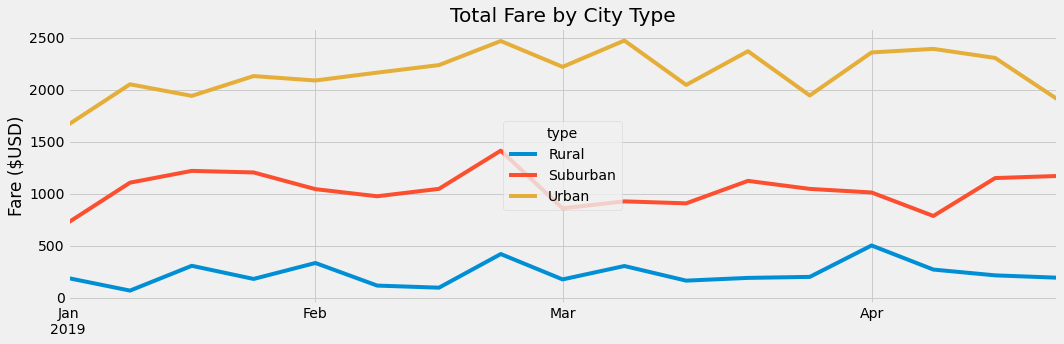

In [77]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create the plot line graph using object-orientated method
fig = plt.figure()
ax = fig.add_subplot()
# use df.plot method
weekly_fares_df.plot(figsize=(15,5),ax=ax)

# Set title and labels
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("")
ax.set_title("Total Fare by City Type")

# Alter the legend position to match sample
ax.legend(loc=10, title="type")

# Export to image
plt.tight_layout()
image_path = os.path.join("analysis","PyBer_fare_summary.png")
plt.savefig(image_path)
